# PyTorch Computer Vision

## Important Computer Vision libraries

1. torchvision - base domain library for computer vision libraries
2. torchvision.datasets - get datasets and loading functions for computer vision
3. torchvision.models - get pretrained models that you can leverage for your own problems
4. torchvision.transforms - convert our images data into some numbers
5. torch.utils.data.Dataset - Base dataset class for PyTorch
6. torch.utils.data.DataLoader - creates a python iterable over a dataset

In [1]:
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor # convert a PIL image / numpy array into a tensor

# import matlplotlib to visualize data
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)




2.4.0+cu121
0.19.0+cu121


## 1. Getting a Dataset

The dataset we'll be using is Fashion MNIST database (grayscale images of pieces of clothing) which is an inbuilt dataset provided by PyTorch library

In [2]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # Where to download the data to
    train=True, # do we want the training dataset?
    download=True, # do we want to download yes/no
    transform=torchvision.transforms.ToTensor(), # how do we want to transform the data?
    target_transform=None # how do we want to transform the labels/targets?
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)


100%|██████████| 26421880/26421880 [00:02<00:00, 11010967.01it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 208561.98it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:07<00:00, 572503.21it/s] 


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 22873174.78it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
# See the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_names[2]

'Pullover'

In [7]:
# to get the dictionaries of labels and the corresponding indexes
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
# One tensor of all the labels
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

### 1.1 Check the output and input shapes of the data

In [9]:
# Check the shape of the image
print(f"Image shape:{image.shape} -> [color_channels, height, width]")
print(f"Image label: {class_names[label]}")
image.shape, label

Image shape:torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


(torch.Size([1, 28, 28]), 9)

### 1.2 Visualizing our data

Image shape: torch.Size([1, 28, 28]) 


Text(0.5, 1.0, '9')

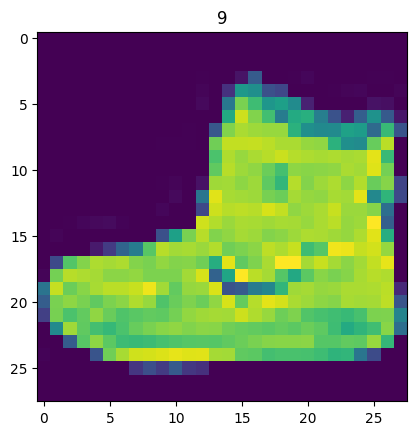

In [10]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape} ")
# plt.imshow(image) this gives an error as for grayscale images pyplot library only expects ht and wd  not color channels
# for colored images it expects the color channels at the last
plt.imshow(image.squeeze())
plt.title(label)

(-0.5, 27.5, 27.5, -0.5)

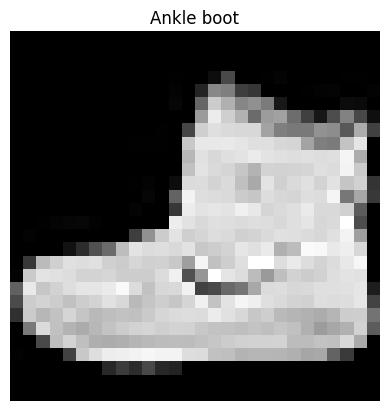

In [11]:
plt.imshow(image.squeeze(),cmap='gray') # cmap to change the colors in matplotlib
plt.title(class_names[label])
plt.axis(False)

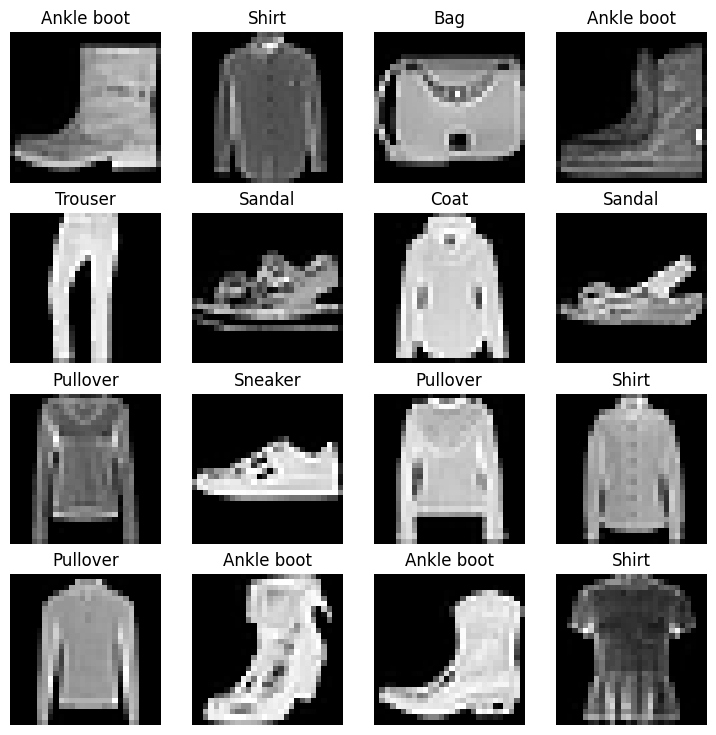

In [12]:
# Plot more random images
torch.manual_seed(42) # using the same seed gives us the same random numbers every time
fig = plt.figure(figsize=(9,9))
rows,cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0,len(train_data),size=[1]).item()
  #print(random_idx)
  img, label =  train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap = 'gray')
  plt.title(class_names[label])
  plt.axis(False)


In [13]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 2. Prepare Data Loader

Rightnow, the data is in the form of pyTorch Datasets.

DataLoader turns our data into a python iterable.

More specifically, we are turning our data into batches or mini batches

Why? -

1. More computationally efficient, as in, your computing hardware may
not be able to look(store in memory) at 60000 images in one hit. So, we break it
down to 32 images at a time(batch size=32)

2. It gives our neural network more chances to upgrade our gradients per epoch



In [14]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn the datasets into iterables
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)
# train dataset is shuffled to ensure randomness in the data while training
# test dataset need not be shuffled

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f018736b1f0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f018736b850>)

In [15]:
len(next(iter(train_dataloader))) # There are two elements that the iterator points to

2

In [16]:
next(iter(train_dataloader))[0].shape # First element is X tensor [batchsize, color_channels,X]

torch.Size([32, 1, 28, 28])

In [17]:
next(iter(train_dataloader))[1].shape # Second elements are the labels of the corresponding batch

torch.Size([32])

In [18]:
# Let's check out what have we created

print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of the train_dataloader: {(len(train_dataloader))} batches of {BATCH_SIZE}...")
print(f"Length of the test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f018736b1f0>, <torch.utils.data.dataloader.DataLoader object at 0x7f018736b850>)
Length of the train_dataloader: 1875 batches of 32...
Length of the test_dataloader: 313 batches of 32...


In [21]:
count = 1
for batch,(X,y) in enumerate(train_dataloader):
  print(f"batch:{batch} X:{X} y:{y}")
  count+=1
  if count==5: break

batch:0 X:tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0392, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0980, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0235, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0

### Short intro to iterators and iterables

Iterables are the elements capable of iterating. Iterators are the objects capable of storing the current state of the object and can update the state of the object to the next state when deemed essential.

In [ ]:
nums = [1,2,3] # Iterable

i_nums = iter(nums) # Iterator

# print(next(i_nums))
# print(next(i_nums))
# print(next(i_nums))

"""
Above lines of code prints :
1
2
3
"""
#if print(next(i_nums)) is used one more time, it throws an error as no more objects are remaining

# while True:
#   try:
#     print(next(i_nums))
#   except StopIteration:
#     break

# The above while loop can be executed in its place to make it run as long as there are elements

item = next(i_nums)
print(item)

for x in enumerate(nums): # Enumerate generates a tuple matching the element of the iterable to a counter, counting default from 0
  print(x)

1
(0, 1)
(1, 2)
(2, 3)


train_dataloader, test_dataloader are our datasets converted into iterables of batches of batch size.

Dataset -> 1875 iterable batches of 32

In the following piece of code, we take the iterable train_dataloader and iter(train_dataloader) denotes the iterator. If next is used over the iterator, it points to the data existing in the initial state of the iterator, which is the initial element of the iterable.

train_features_batch, train_labels_batch initially point to the first batch of images and labels of the first batch of the train_dataloader and they go on to point to the other images in the next batches as they are being called multiple times.

In [ ]:
# Check out what is inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
# images and batches and with iter we are converting into iterables and next gives us the next
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 9, label size: torch.Size([])


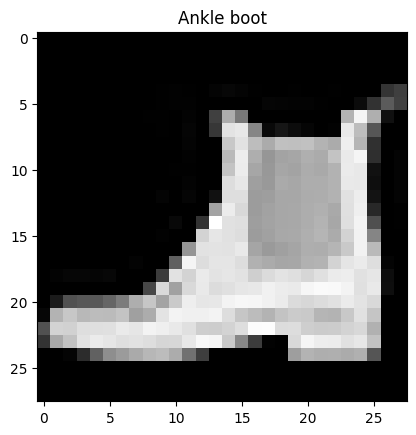

In [ ]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap='gray')
plt.title(class_names[label])
print(f"Image size: {image.shape}")
print(f"Label: {label}, label size: {label.shape}")


Do you thhink these items of could be modelled with pure straight lines Or do you think we need some non-linear curves too?

## 3. Model 0: Building a baseline model

When starting to build a series of machine learning modelling experiments, it is
best practice to start with a base line model.

A base line model is a simple model you will try and improve upon with subsequent models/experiments

In other words: starting simply and adding complexity as necessary





In [ ]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x)

# Printing out what is happening
print(f"The shape of one image withougt flattening: {x.shape}")
print(f"The shape of the image after flattening: {output.shape}")

The shape of one image withougt flattening: torch.Size([1, 28, 28])
The shape of the image after flattening: torch.Size([1, 784])


In [ ]:
# Condensing into one vector space. Why?
# We are using a linear layer as the baseline model and it can only handle
# one single input vector


#output.squeeze().shape


In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self,x):
    return self.layer_stack(x)
  # This method does the forward computation,
  # our model takes an input x, flatten it, send it through two linear layers


In [ ]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=784, # this is 28*28
    hidden_units=10, # how many units in the hidden layer
    output_shape = len(class_names)
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1,1,28,28]) # Batch 1, color channels, ht, width
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

This is exactly what we have wanted... We have got 10 logits in total -> one logit per class...These can later be converted into prediction probabilities of each class

In [ ]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1. Setup loss, optimizer and evaluation metrics

* Loss function -> since, we are dealing with a mult-class classification problem, we should use `nn.CrossEntropyLoss()`

* Optimizer -> We can use a couple of optimizers like SGD and Adam. Let us stick with `torch.optim.SGD()`

* Evaluation metrics -> Since, we are dealing with a classification problem, we can use `Accuracy` as our evaluation metric.
We also have some other metrics like F1score, precision (MAP values) etc..

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists. Skipping download")

else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

In [ ]:
# Import accuracy metrics
from helper_functions import accuracy_fn
# We can also use torch.metrics or write our own function. This is just one way

# Setup loss function
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                             lr=0.1)
loss_fn, optimizer

(CrossEntropyLoss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     fused: None
     lr: 0.1
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

### 3.2. Creating a function to time our experiments

Machine Learning is very expiremental, Generally these are really important to look out for:

1. Model's performance (loss and accuracy values)
2. How fast it runs

In [ ]:
from timeit import default_timer as timer
def print_train_time(start:float,
                     end:float,
                     device: torch.device=None):
  """ Prints the difference between start and end times. """
  total_time = end - start
  print(f"Train time on {device}:{total_time:.3f} seconds")
  return total_time

In [ ]:
start_time = timer()
# some code...
end_time = timer()
print_train_time(start=start_time,end=end_time)

Train time on None:0.000 seconds


4.167300001256535e-05

In [ ]:
next(iter(test_dataloader))[0].shape

torch.Size([32, 1, 28, 28])

### 3.3 Creating a training loop and training the model on batches of data..

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss per batch
3. Loop through testing batches, perform testing steps, calculate the test loss per batch.
4. Print out what's happening
5. Time it all (for fun).

In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for training time)
epochs = 3

# Creating training and testing loops
for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}\n -----")

  ### Training
  train_loss = 0
  # Add a loop to loop through the training batches
  for batch, (X,y) in (enumerate(train_dataloader)):
    model_0.train()

    # 1. Do the forward pass
    y_pred = model_0(X)

    # Calculate the loss per batch
    loss = loss_fn(y_pred,y) # Outputs logits to CrossEntropyLoss() function
    train_loss += loss # Accumulate training loss

    # Optimizer zero grad
    optimizer.zero_grad()

    # loss.backward
    loss.backward()

    # optimizer step step step...
    optimizer.step()

    # Print out what's happening
    if batch % 400 == 0:
      # len(X) is going to be 32, len(train_dataloader.dataset) going to be 60000
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples)")

# Note that all the training loop is inside the batch loop instead of epoch loop
# As optimizer.step() is inside the batch loop, the gradient descent step happens only happens after every batch rather than every epoch
# We are calculating the loss with in the batch, accumulating it over the batch and
# finally use the average training loss over the batch later to evaluate the model

  # Coming back to the epoch loop to calculate the average error
  # Dividing total train loss over all the batches by the length of train dataloader -> How many batches there are in the train dataloader
  train_loss /= len(train_dataloader) # Dividing with 1875

  ### Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader: # No batches iteration in test dataloader as no need to update parameters per batch
      # 1. Forward pass
      test_pred = model_0(X_test) # Outputs logits

      # Calculate the loss (accumulation) | Accuracy
      test_loss += loss_fn(test_pred,y_test)

      # Calculating accuracy
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1)) # logits-> predictionlabels

    # Calculate the test loss average per epoch
    test_loss /= len(test_dataloader) # Dividing the loss by total number of batches in test_dataloader

    # Calculating the average test accuracy per epoch
    test_acc /= len(test_dataloader)

  # Print out what's happening
  print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f} | Test accuarcy: {test_acc:.2f}")

# Calculate the training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device)) # next(model_0.parameters()).device -> another way of getting the model on which the model is on

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
 -----
Looked at 0/60000 samples)
Looked at 12800/60000 samples)
Looked at 25600/60000 samples)
Looked at 38400/60000 samples)
Looked at 51200/60000 samples)

Train loss: 0.5904 | Test loss: 0.5095 | Test accuarcy: 82.04
Epoch:1
 -----
Looked at 0/60000 samples)
Looked at 12800/60000 samples)
Looked at 25600/60000 samples)
Looked at 38400/60000 samples)
Looked at 51200/60000 samples)

Train loss: 0.4763 | Test loss: 0.4799 | Test accuarcy: 83.20
Epoch:2
 -----
Looked at 0/60000 samples)
Looked at 12800/60000 samples)
Looked at 25600/60000 samples)
Looked at 38400/60000 samples)
Looked at 51200/60000 samples)

Train loss: 0.4550 | Test loss: 0.4766 | Test accuarcy: 83.43
Train time on cpu:27.633 seconds


## Setting up device agnostic code (Using a GPU if available)

In [ ]:
!nvidia-smi

Thu May 23 11:49:05 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8              11W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
torch.cuda.is_available()

True

In [ ]:
# Setup device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 4. Make predictions and get Model 0 results

In [ ]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn,
               device=device):

  """Results a dictionary containing the results of model predicting on data_loader."""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:

      # Make device agnostic code
      X,y = X.to(device),y.to(device)
      model = model.to(device)
      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and accuracy values per epoch
      loss += loss_fn(y_pred,y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    # Scale the loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,# only works when model was created with classes
          "model_loss": loss.item(), # turning the loss into a single value
          "model_acc" : acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## 6. Model 1: Building a model with non-linearity

In [ ]:
# Model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU()
    )

  def forward(self,x):
    return self.layer_stack(x)

In [ ]:
# Create an instance of the model_1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

### 6.1 Setup loss function and optimizer

In [ ]:
# Create a loss function and optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

loss_fn,optimizer

(CrossEntropyLoss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     fused: None
     lr: 0.1
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

### 6.2 Functionizing training and evaluating loops

Creating functions for:
* training loop - train_step()
* testing loop - test_step()

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device=device):
  """Performs a training loop step on model going over data_loader."""
  train_loss, train_acc = 0,0

  # Put the model into training mode
  model.train()

  for batch,(X,y) in enumerate(data_loader):

    # Send the data to the target device
    X,y = X.to(device),y.to(device)
    # Do the forward pass
    y_pred = model(X) # Outputs logits

    # Calculate the loss | accuracy and accumulate over the batch
    loss = loss_fn(y_pred,y)
    train_loss += loss
    acc = accuracy_fn(y_true=y,
                      y_pred=y_pred.argmax(dim=1)) # logits -> prediction_labels
    train_acc += acc

    # Optimizer zero_grad
    optimizer.zero_grad()

    # loss.backward
    loss.backward()

    # Optimizer step step step
    optimizer.step()

  # Divide total train loss and accuracy by the length of the train data loader -> number of batches: 1875
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train Acc: {train_acc:.2f}%\n")

In [ ]:
def test_step(model:nn.Module,
              data_loader:torch.utils.data.DataLoader,
              loss_fn:nn.Module,
              accuracy_fn,
              device:torch.device=device):
  """Performs a testing loop step on model going over data_loader"""
  test_loss, test_acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:

      # Send the data to the target device
      X,y = X.to(device),y.to(device)

      # Make predictions
      y_test_pred = model(X)

      # Accumulate loss and accuracy over the batch
      test_loss += loss_fn(y_test_pred,y)
      test_acc += accuracy_fn(y_true=y,
                              y_pred=y_test_pred.argmax(dim=1)) # logits -> prediction labels

    test_loss /= len(data_loader) # Dividing by 1875 -> no of batches
    test_acc /= len(data_loader)

    # Print out what's happening
    print(f"Test loss: {test_loss:.5f} | Test acc:{test_acc:.2f}%\n")


In [ ]:
### Training loop and testing loops using above functions
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# set epochs
epochs = 3

# Create an optimization and evaluation loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n--------")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn = accuracy_fn,
             device=device)

  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------
Train loss: 1.09199 | Train Acc: 61.34%

Test loss: 0.95636 | Test acc:65.00%

Epoch: 1
--------
Train loss: 0.78101 | Train Acc: 71.93%

Test loss: 0.72227 | Test acc:73.91%

Epoch: 2
--------
Train loss: 0.67027 | Train Acc: 75.94%

Test loss: 0.68500 | Test acc:75.02%

Train time on cuda:30.910 seconds


In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [ ]:
total_train_time_model_0

27.63278036300001

In [ ]:
total_train_time_model_1

30.90988669700002

**Note:** Sometimes, depending on the data/hardware we might find that the model trains faster on CPU than on GPU...

What might be the possible reason?

1. It could be that the overhead from copying the data/model to and from the GPU outweights the compute benefits offered by the GPU.
2. The hardware we're using has a better CPU in terms of compute capability than the GPU

For more on knowing about computation of the models - refer this article
https://horace.io/brrr_intro.html


In [ ]:
# Get model_1 results dictionary, so that we can refer later
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## Model 2: Building a Convolutional Neural Network (CNN)

ConvNets - They are known for their ability to find patterns in the visual data

CNN explainer - https://poloclub.github.io/cnn-explainer/

In [ ]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replicates TinyVGG
  model from CNN explainer website
  """
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    # A block is comprised of multiple layers and the entire model consists of several blocks
    # An example block is convolution layer, non-linear layer,convolution layer, non-linear layer, pooling layer
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape, # Number of color channels in the input image *nc[l-1] in Andrew's words
                  out_channels=hidden_units, # Number of filters being applied *nc[l] in Andrew's words
                  kernel_size=3,
                  stride=1,
                  padding=1), # values we can set by ourselves in NNs are called hyper parameters
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
        )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier_layer = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, # As that is the o/p shape of the conv_block2
                  out_features=output_shape)
    )
    # The first two blocks are layers that do feature extraction
    # The final block would be classification layer -> the layer that classifies the given image into a class
  def forward(self,x):
    x = self.conv_block_1(x)
    #print(f"Output shape after conv_block1:{x.shape}")
    x = self.conv_block_2(x)
    #print(f"Output shape after conv_block2:{x.shape}")
    x = self.classifier_layer(x)
    #print(f"Output shape after classifier:{x.shape}")
    return x


In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, # Since we have b/w images and color channels=1
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
#model_2

we can create a random image tensor of the same shape as our training images and see if the model works

In [ ]:
random_image_tensor = torch.randn(1,28,28)
random_image_tensor.shape

torch.Size([1, 28, 28])

In [ ]:
# Pass the image through the model
# We have to unsqueeze as the image is in the format of batchsize,color_channels,h,w
model_2(random_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], device='cuda:0', grad_fn=<AddmmBackward0>)

### 7.1. Stepping through nn.Conv2d()

Breaking down what's happening in this layer

In [ ]:
torch.manual_seed(42)

# Creating a dummy batches of images
images = torch.randn(size=(32,3,64,64)) # batch, channels, height, width
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single Image shape: {images[0].shape}")
print(f"Test image: {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single Image shape: torch.Size([3, 64, 64])
Test image: tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.

In [ ]:
test_image.shape

torch.Size([3, 64, 64])

In [ ]:
# Create a single Conv2d layer
conv_layer = nn.Conv2d(in_channels=3, # No of color channels in the input images *nc[l-1] in Andrew's words
                    out_channels=10, # Number of filters being applied on the image *nc[l] in Andrew's words
                    kernel_size=3,
                    stride=1,
                    padding=0)

# Pass the data through the convolutional layer
conv_output = conv_layer(test_image)
conv_output

tensor([[[-2.8778e-01, -6.0596e-02, -5.6306e-02,  ...,  2.8654e-01,
           6.6224e-01, -2.3216e-01],
         [-9.8911e-01, -4.0099e-01,  4.1832e-01,  ...,  4.7459e-01,
          -1.8552e-01, -5.7622e-01],
         [-4.1340e-02, -2.3277e-01,  3.7418e-01,  ...,  2.8255e-02,
           1.4923e-01,  1.4236e-01],
         ...,
         [-8.0374e-01, -7.6687e-01, -5.9457e-02,  ...,  1.7452e-01,
           4.2594e-01, -4.8341e-01],
         [-1.4512e-01, -1.1566e-01,  6.1783e-01,  ...,  2.4126e-01,
          -3.6626e-01,  3.5645e-01],
         [ 3.6096e-02,  1.5214e-01,  2.3123e-01,  ...,  3.0904e-01,
          -4.9680e-01, -7.2258e-01]],

        [[-1.0853e+00, -1.6079e+00,  1.3346e-01,  ...,  2.1698e-01,
          -1.7643e+00,  2.5263e-01],
         [-8.2507e-01,  6.3866e-01,  1.8845e-01,  ..., -1.0936e-01,
           4.8068e-01,  8.4869e-01],
         [ 6.4927e-01, -4.2061e-03, -4.9991e-01,  ...,  5.8356e-01,
           2.4611e-01,  6.6233e-01],
         ...,
         [ 9.8860e-02,  1

In [ ]:
test_image.shape

torch.Size([3, 64, 64])

In [ ]:
conv_output.shape

torch.Size([10, 62, 62])

### 7.2 Stepping through nn.MaxPool2d layer

In [ ]:
test_image.shape

torch.Size([3, 64, 64])

In [ ]:
# Test image original shape
print(f"Shape of the original test image: {test_image.shape}")
# Create a sample nn.MaxPool2d layer
maxpool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv layer
test_image_through_conv = conv_layer(test_image)
print(f"Shape after going through the conv layer: {test_image_through_conv.shape} ")

# Pass data through the maxpool layer
test_image_through_conv_and_maxpool = maxpool_layer(test_image_through_conv)
print(f"Shape after going through the conv and maxpool layers: {test_image_through_conv_and_maxpool.shape}")

Shape of the original test image: torch.Size([3, 64, 64])
Shape after going through the conv layer: torch.Size([10, 62, 62]) 
Shape after going through the conv and maxpool layers: torch.Size([10, 31, 31])


We can observe that initially the image has the dimensions: `(64,64,3)`

**After passing through conv layer 1:**
* Application of 10 filters of `kernel_size = (3,3)` and `stride=1` with `padding=0`
* The output shape is `(62,62,10)`

**After passing through the maxpool layer:**
* Applying maxpool operation on 10 layers distinctly with `kernel_size=2`, `stride=2`
* The resulting output shape is: `(31,31,10)`

In [ ]:
torch.manual_seed(42)
# Visualising what maxpool layer is doing
random_tensor = torch.randn(size=(1,1,2,2)) # batch, color_channels, ht, width
print(f"Random image tensor: \n{random_tensor}")
print(f"Shape of the random image tensor: {random_tensor.shape}")

# Creatintg a maxpool layer like we have done above
maxpool_layer = nn.MaxPool2d(kernel_size=2)

# Passing the random tensor through the maxpool layer
random_tensor_through_maxpool = maxpool_layer(random_tensor)

print(f"Random tensor after passing through maxpool layer: {random_tensor_through_maxpool}")
print(f"Shape of the random tensor after passing through the maxpool layer:{random_tensor_through_maxpool.shape}")

Random image tensor: 
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Shape of the random image tensor: torch.Size([1, 1, 2, 2])
Random tensor after passing through maxpool layer: tensor([[[[0.3367]]]])
Shape of the random tensor after passing through the maxpool layer:torch.Size([1, 1, 1, 1])


### 7.3 Setup a loss function and optimizer for model_2

In [ ]:
from helper_functions import accuracy_fn

# Setting up the loss function/eval metrics
loss_fn = nn.CrossEntropyLoss()

# Setting up the optimizer
optimizer = torch.optim.SGD(params=model_2.parameters(),
                             lr=0.1)

loss_fn, optimizer

(CrossEntropyLoss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     fused: None
     lr: 0.1
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

### 7.4 Training and testing `model_2` through our train_step and test_step functions

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}\n -----")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
 -----
Train loss: 0.59566 | Train Acc: 78.46%

Test loss: 0.39489 | Test acc:85.75%

Epoch:1
 -----
Train loss: 0.36171 | Train Acc: 86.94%

Test loss: 0.36006 | Test acc:86.85%

Epoch:2
 -----
Train loss: 0.32544 | Train Acc: 88.33%

Test loss: 0.34530 | Test acc:87.53%

Train time on cuda:38.075 seconds


In [ ]:
# Get model_2 results
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3453006446361542,
 'model_acc': 87.52995207667732}

## 8. Compare model results and training time

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                               model_1_results,
                               model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.345301,87.529952


In [ ]:
# Add training time to results comparison
compare_results["training time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training time
0,FashionMNISTModelV0,0.476639,83.426518,27.632780
1,FashionMNISTModelV1,0.685001,75.019968,30.909887
2,FashionMNISTModelV2,0.345301,87.529952,38.074825


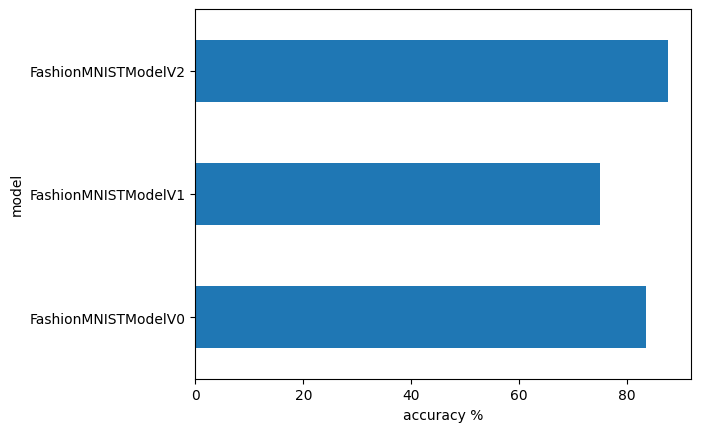

In [ ]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy %")
plt.ylabel("model");

## 9. Make and evaluate random predictions with the best model

In [ ]:
def make_predictions(model:nn.Module,
                     data:list,
                     device:torch.device=device):
  # Take random samples from the training data and make predictions using our model and visualize them
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample
      sample = torch.unsqueeze(sample,dim=0).to(device)

      # Forward pass (model outputs as logits)
      pred_logit = model(sample)

      # Get prediction probability
      pred_prob = torch.softmax(pred_logit.squeeze(),dim=0)

      # Get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

In [ ]:
img,label = test_data[0]
img.shape, label

(torch.Size([1, 28, 28]), 9)

In [ ]:
import random
#random.seed(42)
test_samples = []
test_labels = []

# We are randomly sampling 9 images and labels from the test_data
for sample, label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape


torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

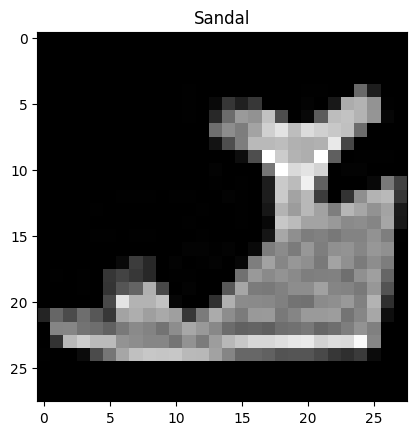

In [ ]:
plt.imshow(test_samples[0].squeeze(),cmap="gray")
plt.title(class_names[test_labels[0]])

In [ ]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

# View the first two prediction probabilities
pred_probs[:2]

tensor([[4.2058e-06, 4.2701e-08, 1.9137e-06, 3.1972e-08, 8.9898e-08, 9.9952e-01,
         2.5262e-06, 1.5511e-05, 3.1827e-04, 1.3479e-04],
        [1.7713e-03, 1.3147e-04, 8.7706e-02, 5.9356e-04, 5.7230e-01, 1.2233e-04,
         3.3393e-01, 1.7142e-06, 3.3072e-03, 1.3116e-04]])

In [ ]:
# Convert prediction probabilities into labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 4, 7, 8, 9, 0, 8, 9, 6])

In [ ]:
test_labels

[5, 4, 7, 8, 9, 0, 8, 9, 6]

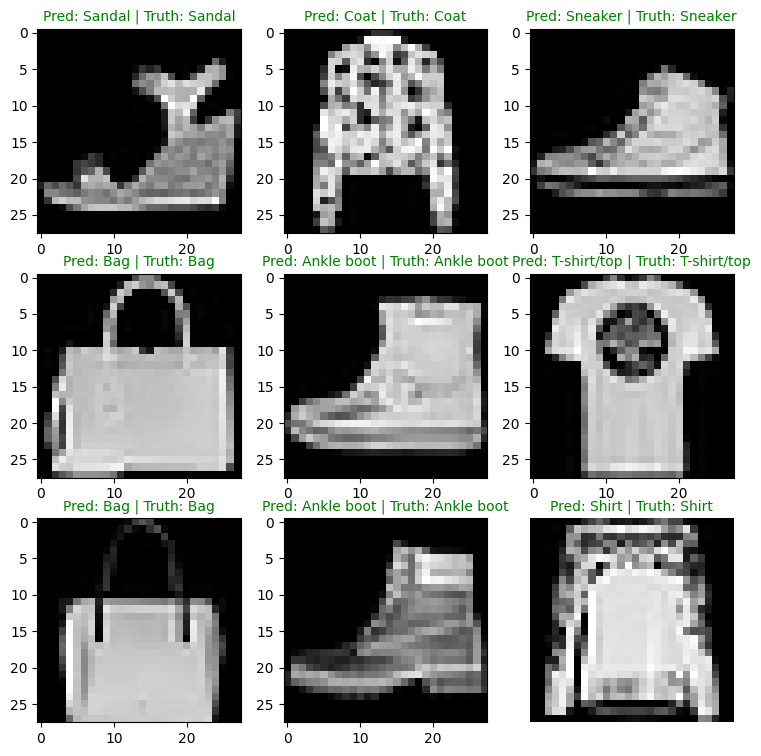

In [ ]:
# Visualizing predictions
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows,ncols,i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(),cmap="gray")

  # Find the prediction in text form (eg. Sandal)
  pred_label = class_names[pred_classes[i]]

  # Get the truth label in text form
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality between pred and truth, change the color of title text
  if pred_label == truth_label:
    plt.title(title_text,fontsize=10,c="g") # Green text if the predictions are same as the truth

  else:
    plt.title(title_text,fontsize=10,c="r") # red label if the predictions are wrong

plt.axis(False);


## 10. Making a confusion matrix for further evaluation

A confusion matrix is a fantastic way of visualizing our classification models

1. Make predictions with the trained model on the test dataset
2. Make a confusion matrix `torchmetrics,ConfusionMatrix`
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`

In [ ]:
# Import tqdm.auto
from tqdm.auto import tqdm

# Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader,desc="Making predictions..."):
    # Send the data and targets to target device
    X,y = X.to(device),y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction probs -> pred labels
    y_pred = torch.softmax(y_logit.squeeze(),dim=1).argmax(dim=1)
    # Put predictions on cpu for evaluation (we will be plotting)
    y_preds.append(y_pred.cpu())

# y_preds is a tensor of the list of classes of 32 images i.e., 313 tensors of classes of respective images in each batch
# Now we need to concatenate list of predictions into a single tensor
#print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10],y_pred_tensor.shape


Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

(tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7]), torch.Size([10000]))

Now we have the labels of all the 10000 test dataset images with our model

In [ ]:
# See if the required packages are installed and if not, install them...
try:
  import torchmetrics,mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be 0.19.0 or higher"
except:
  ! pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version:{mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 56.6 MB/s eta 0:00:00
mlxtend version:0.22.0


In [ ]:
import mlxtend
mlxtend.__version__

'0.22.0'

In [ ]:
test_data.targets # labels

tensor([9, 2, 1,  ..., 8, 1, 5])

In [ ]:
test_data.classes # classses

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

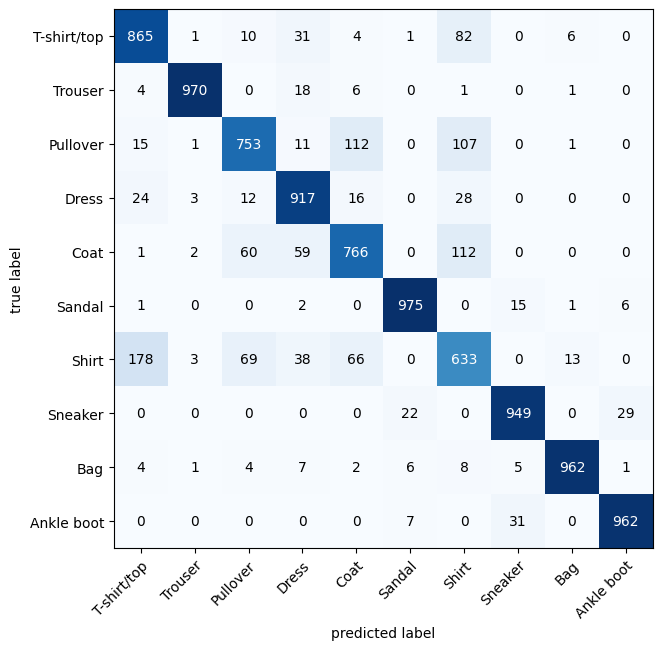

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
# Note that this snippet of code is different from Daniel's code as it was updated
confmat = ConfusionMatrix(task="multiclass",num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with numpy
    class_names=class_names,
    figsize=(10,7)
)

## 11. Saving and loading our best model


In [ ]:
from pathlib import Path

# Creat a model directory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Create a models save path
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

PosixPath('models/03_pytorch_computer_vision_model_2.pth')

In [ ]:
# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


In [ ]:
# Load the model
torch.manual_seed(42)

# Create a new instance

loaded_model_2 = FashionMNISTModelV2(input_shape=1, # color channels of the input image
                                     hidden_units=10,
                                     output_shape=len(class_names))

# Load the save_state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send the model to the target device
loaded_model_2 = loaded_model_2.to(device)
loaded_model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
# Evaluate the loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3453006446361542,
 'model_acc': 87.52995207667732}

In [ ]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3453006446361542,
 'model_acc': 87.52995207667732}

In [ ]:
# Check if model results are close to each other programatically
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol = 1e-08) # Tolerance level

tensor(True)